In [1]:
%load_ext autoreload
%autoreload 2

from sparse_causal_model_learner_rl.config import Config
from sparse_causal_model_learner_rl.sacred_gin_tune.sacred_wrapper import load_config_files
%matplotlib inline
import vectorincrement
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
import gin
import pickle

gin.enter_interactive_mode()

In [2]:
ckpt = '/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_lagrange_dual_sparsity/main_fcn_03c93_00000_0_2021-03-24_17-14-31/checkpoint_1000/checkpoint'

In [3]:
l=pickle.load(open(ckpt, 'rb'))

Selecting name 269ed176-8cbf-11eb-81af-90e2baa15164


2021-03-24 17:36:59,006	INFO services.py:1092 -- View the Ray dashboard at http://127.0.0.1:8267


Make environment SparseMatrix-v0 None {}
(pid=14884) Make environment SparseMatrix-v0 None {}
(pid=14881) Make environment SparseMatrix-v0 None {}


(pid=14960) Make environment SparseMatrix-v0 None {}


ERROR:root:Cannot collect data Use collect_and_get_context



[False, False, False]
[20, 128, 128, 1] 5
LSD (OrderedDict([('tensor', tensor([0.0000, 5.3772, 5.3772, 5.5179, 0.0000, 5.0779, 5.0779, 3.9594, 0.0000,
        2.7927, 2.7927, 3.0030, 0.0000], device='cuda:0')), ('initialized', [False, True, True, True, False, True, True, True, False, True, True, True, False])]),) {'strict': False}


In [13]:
initd = l.lagrange_multipliers.initialized
initd[:] = [True] * len(initd)

In [14]:
from sparse_causal_model_learner_rl.loss.losses import lagrangian_granular, manual_switch_gradient, fit_loss_obs_space, sparsity_loss

In [15]:
ctx = l.collect_and_get_context()

In [16]:
fit_loss_obs_space

<function sparse_causal_model_learner_rl.loss.losses.fit_loss_obs_space(obs_x, obs_y, action_x, decoder, model, additional_feature_keys, reconstructor, model_forward_kwargs=None, fill_switch_grad=False, opt_label=None, add_fcons=True, obs_relative=False, rot_pre=None, rot_post=None, divide_by_std=False, detach_features=False, detach_rotation=False, loss_coeff=1.0, cross_std=True, loss_local_cache=None, **kwargs)>

In [17]:
lobj = fit_loss_obs_space(**ctx, fill_switch_grad=True, detach_features=True, detach_rotation=True, cross_std=False)
lobj

{'loss': tensor(-14.4611, device='cuda:0', grad_fn=<MeanBackward1>),
 'losses': {'additional': 0.0,
  'obs': tensor(-14.4611, device='cuda:0', grad_fn=<MeanBackward0>),
  'feat': tensor(-4.7009, device='cuda:0', grad_fn=<MeanBackward0>),
  'feat_model': tensor(-4.7009, device='cuda:0', grad_fn=<MeanBackward0>),
  'additional_orig': 0.0,
  'obs_orig': tensor(0.0911, device='cuda:0', grad_fn=<MeanBackward0>),
  'feat_orig': tensor(0.0852, device='cuda:0', grad_fn=<MeanBackward0>),
  'feat_model_orig': tensor(0.0852, device='cuda:0', grad_fn=<MeanBackward0>)},
 'metrics': {'mean_feature': array([-0.02494491, -0.00137483,  0.01484528,  0.06890202, -0.02085501],
        dtype=float32),
  'std_feature': array([0.9817697, 0.958856 , 1.0137252, 0.9807892, 0.9322602],
        dtype=float32),
  'min_feature': -3.516925811767578,
  'max_feature': 3.926459789276123,
  'loss_fcons': 0.08522416651248932,
  'loss_add': 0.0,
  'loss_rec': 0.09114525467157364,
  'loss_fcons_pre': 0.08522416651248932,
 

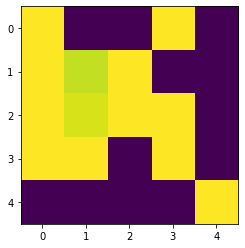

In [18]:
plt.imshow(l.graph[0])

In [19]:
lobj['losses']['obs'].backward()

In [20]:
l.model.model.switch.probas.grad

tensor([[ 1.2767e-02, -1.7813e-01, -8.9067e-01, -2.0165e-01, -5.7327e-02],
        [ 1.7015e-01, -3.8461e-01, -1.7087e-01, -8.5525e-01, -6.7738e-02],
        [-8.3277e-02, -2.2391e+00, -2.0598e+00, -2.0939e-01,  3.4961e-02],
        [-2.0223e+00, -1.5098e-01,  2.6599e-02, -1.6657e+00,  5.1910e-02],
        [-2.5984e-01, -1.0696e-01,  4.3188e-02,  3.4344e-01, -3.5973e+00],
        [ 7.0448e-02,  9.0063e-02,  6.5172e-02, -2.8876e-02, -9.2650e-02],
        [-7.9748e-02,  4.8427e-02,  1.2680e-01, -3.3581e-02,  4.1253e-02],
        [ 5.0547e-01, -1.7931e-03,  3.2228e-01,  8.5092e-02, -8.3125e-02],
        [ 9.1152e-03, -8.1050e-01,  2.7972e-03, -6.9117e-02,  9.5062e-03],
        [-1.7828e-01,  2.7503e-04, -1.2142e-01,  3.2002e-01, -1.3705e-01]],
       device='cuda:0')

In [21]:
[opt.zero_grad() for opt in l.optimizer_objects.values()]

[None, None]

In [22]:
gin.query_parameter('%LOSSES_DICT')['fit']['fcn']

@fit/fit_loss_obs_space

In [23]:
lobj = lagrangian_granular(**ctx, mode='PRIMAL')
lobj

{'loss': tensor(-3678.5850, device='cuda:0', grad_fn=<AddBackward0>),
 'metrics': {'fit': {'value': -9.63031005859375,
   'coeff': 1.0,
   'mean_feature': array([-0.02494491, -0.00137483,  0.01484528,  0.06890202, -0.02085501],
         dtype=float32),
   'std_feature': array([0.9817697, 0.958856 , 1.0137252, 0.9807892, 0.9322602],
         dtype=float32),
   'min_feature': -3.516925811767578,
   'max_feature': 3.926459789276123,
   'loss_fcons': 0.07286059111356735,
   'loss_add': 0.0,
   'loss_rec': 0.07858201861381531,
   'loss_fcons_pre': 0.07286059111356735,
   'rec_fit_acc_loss_01_agg': 1.0197999477386475,
   'loss_discrete': -9.854612350463867,
   'loss_orig': 0.2243022918701172},
  'fit/additional': {'value': 0.0},
  'fit/obs': {'value': -9.63031005859375},
  'fit/feat': {'value': -3.1311240196228027},
  'fit/feat_model': {'value': -3.1311240196228027},
  'fit/additional_orig': {'value': 0.0, 'coeff': 1.0},
  'fit/obs_orig': {'value': 0.07858201861381531, 'coeff': 1.0},
  'fit/

In [24]:
l.lagrange_multipliers.tensor

Parameter containing:
tensor([0.0000, 5.3772, 5.3772, 5.5179, 0.0000, 5.0779, 5.0779, 3.9594, 0.0000,
        2.7927, 2.7927, 3.0030, 0.0000], device='cuda:0', requires_grad=True)

In [25]:
lobj['loss'].backward()

In [26]:
l.model.model.switch.probas.grad

tensor([[-2.6378e+01,  5.2721e+01, -2.7863e+02,  7.8382e+01, -3.6744e+01],
        [-8.6927e+00,  4.2234e+01, -1.9887e+01, -7.0929e+02, -2.1212e+01],
        [-1.6683e+01, -4.0947e+02, -3.6038e+02, -1.6738e+01, -2.8917e+01],
        [-8.3332e+02, -4.9283e+01,  6.6803e+01, -5.4620e+02, -2.7566e+01],
        [ 2.2100e+01,  9.5479e+00, -2.0326e+01,  2.3670e+01, -7.1586e+02],
        [-5.5888e+01, -3.5426e+01,  8.3137e+00, -5.5485e+01, -3.5016e+01],
        [ 7.6612e+00,  3.2475e+01, -1.6299e+02,  8.0144e+01,  5.9703e+01],
        [-1.2445e+01,  1.4461e+00,  4.2688e+01, -1.8586e+01, -1.0125e+01],
        [ 4.6902e+00,  4.2396e+01,  1.4163e+01,  6.3979e+00,  2.0763e+01],
        [-5.0709e+01, -5.3661e-01,  3.6108e+01, -4.3628e+00, -3.9446e+01]],
       device='cuda:0')